<a href="https://colab.research.google.com/github/mekaruna13/DataAnalysis/blob/main/HousetonDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [ ]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


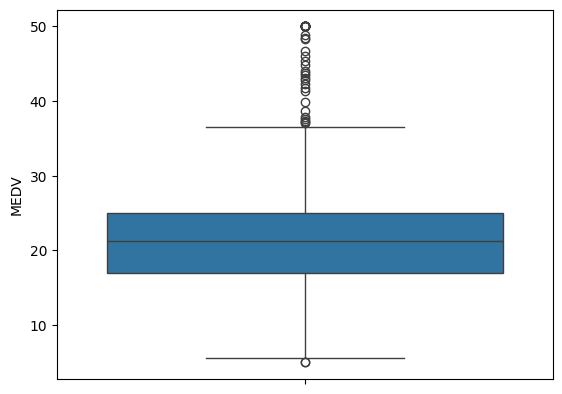

In [ ]:
ax = sns.boxplot(data=boston_df,y='MEDV')
pyplot.show()

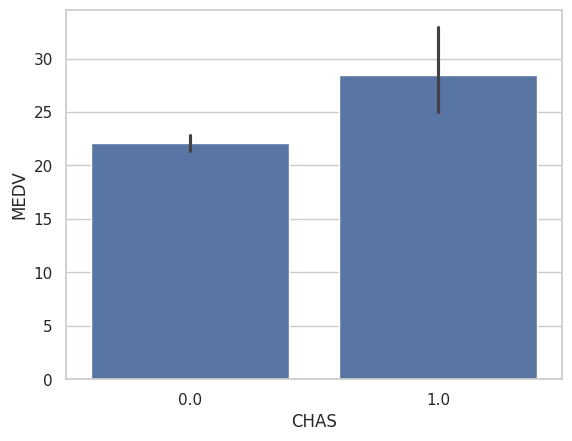

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(data=boston_df,x='CHAS',y='MEDV')
pyplot.show()

<ipython-input-6-2c4879838236>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df, palette="Set2")


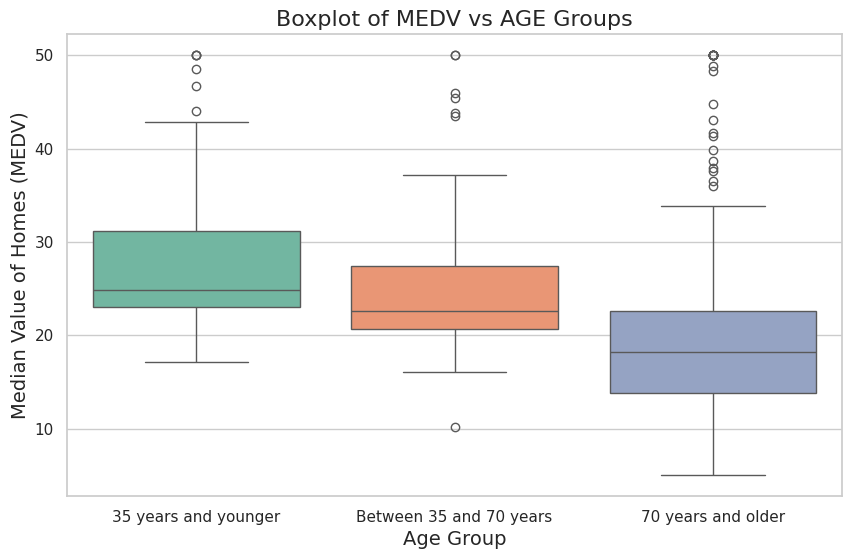

In [ ]:
boston_df['AGE_Group'] = pd.cut(
    boston_df['AGE'],
    bins=[0, 35, 70, 100],
    labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older']
)

# Plotting the boxplot for MEDV vs AGE_Group
pyplot.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df, palette="Set2")
pyplot.title('Boxplot of MEDV vs AGE Groups', fontsize=16)
pyplot.xlabel('Age Group', fontsize=14)
pyplot.ylabel('Median Value of Homes (MEDV)', fontsize=14)
pyplot.show()

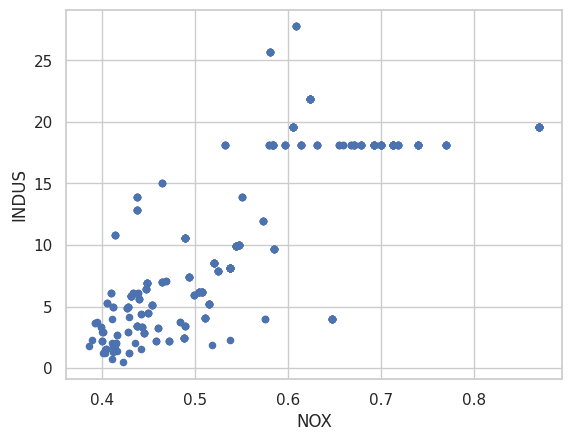

In [ ]:
boston_df.plot(kind = 'scatter', x = 'NOX', y = 'INDUS')

pyplot.show()

<Axes: ylabel='Frequency'>

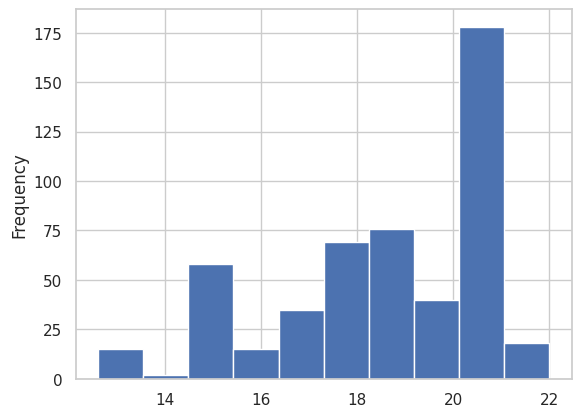

In [ ]:
boston_df['PTRATIO'].plot(kind='hist')

In [ ]:
from scipy.stats import ttest_ind
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']  # Bounded by Charles River
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']  # Not bounded by Charles River

# Perform t-test for independent samples
t_stat, p_value = ttest_ind(chas_1, chas_0, equal_var=False)

# Print the results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in the median value of houses based on proximity to the Charles River.")
else:
    print("There is no significant difference in the median value of houses based on proximity to the Charles River.")

t-statistic: 3.113291312794837
p-value: 0.0035671700981375174
There is a significant difference in the median value of houses based on proximity to the Charles River.


In [ ]:
from scipy.stats import f_oneway
boston_df['AGE_Group'] = pd.cut(
    boston_df['AGE'],
    bins=[0, 35, 70, 100],
    labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older']
)

# Group the data based on AGE_Group
group1 = boston_df[boston_df['AGE_Group'] == '35 years and younger']['MEDV']
group2 = boston_df[boston_df['AGE_Group'] == 'Between 35 and 70 years']['MEDV']
group3 = boston_df[boston_df['AGE_Group'] == '70 years and older']['MEDV']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(group1, group2, group3)

# Print the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in median values of houses (MEDV) across the AGE groups.")
else:
    print("There is no significant difference in median values of houses (MEDV) across the AGE groups.")

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
There is a significant difference in median values of houses (MEDV) across the AGE groups.


In [ ]:
from scipy.stats import pearsonr
NOX = boston_df['NOX']  # Nitric Oxide concentrations
INDUS = boston_df['INDUS']  # Proportion of non-retail business acres per town

# Calculate Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(NOX, INDUS)

# Print the results
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town.")
else:
    print("There is no significant relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town.")

Pearson Correlation Coefficient: 0.7636514469209151
P-value: 7.913361061239527e-98
There is a significant relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town.


In [ ]:
import statsmodels.api as sm
X = boston_df['DIS']  # Weighted distance to employment centers
y = boston_df['MEDV']  # Median value of owner-occupied homes

# Add a constant to the model for the intercept
X = sm.add_constant(X)

# Perform regression analysis
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        13:13:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0